In [1]:
import os
import sys
ROOT_DIR = os.path.dirname(os.getcwd())
sys.path.append(ROOT_DIR)
from player.scoring import WordleScorer as ws
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
# update 
file_path = 'valid-wordle-words.txt'
scorer = ws.WordleScorer('delay', file_path)

In [3]:
# calculate after each guess to see how the search space is reduced after the intersection
scorer.count_words()

14855

In [4]:
# letter freq & scores
letter_frequencies = Counter(scorer.get_overall_freq())
letter_scores = scorer.letter_scores()

starting_letter_frequencies = Counter(scorer.get_first_freq())
pos1_scores = scorer.letter_scores()

second_letter_frequencies = Counter(scorer.get_second_freq())
pos2_scores = scorer.letter_scores()

third_letter_frequencies = Counter(scorer.get_third_freq())
pos3_scores = scorer.letter_scores()

fourth_letter_frequencies = Counter(scorer.get_fourth_freq())
pos4_scores = scorer.letter_scores()

last_letter_frequencies = Counter(scorer.get_fifth_freq())
pos5_scores = scorer.letter_scores()

In [5]:
# plot Zipf's law
def plot_zipfs_law(letter_counts, title):

    # sort letters by frequency
    letters, frequencies = zip(*letter_counts.most_common())
    ranks = range(1, len(frequencies) + 1)

    # apply Zipf's law: f = c / r (where f is frequency, r is rank, c is frequency of most common letter)
    constant = frequencies[0]
    expected_frequencies = [constant / r for r in ranks]
    plt.figure(figsize=(10, 5))

    # plotting actual and expected frequencies (log-log plot)
    plt.loglog(ranks, frequencies, marker='o', linestyle='none', label='Actual Frequencies')
    plt.loglog(ranks, expected_frequencies, label='Expected by Zipf\'s Law', linestyle='--')
    plt.xlabel('Rank of letter (most common to least common)')
    plt.ylabel('Frequency of letter')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.xticks(ranks, letters)
    plt.show()

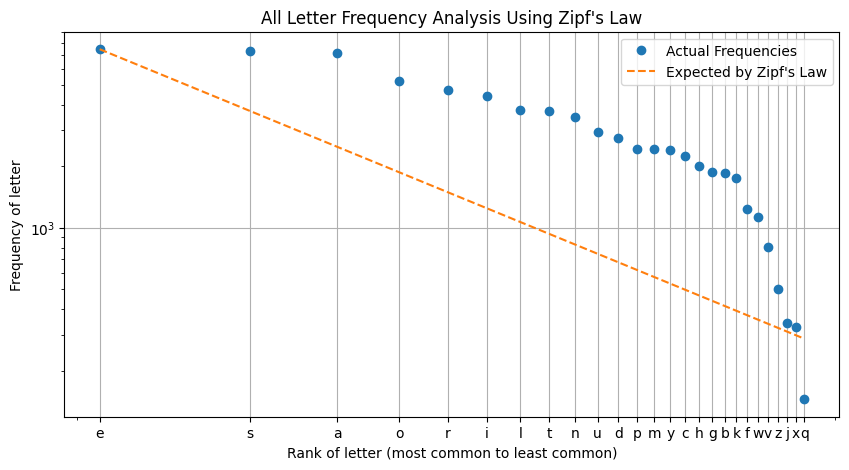

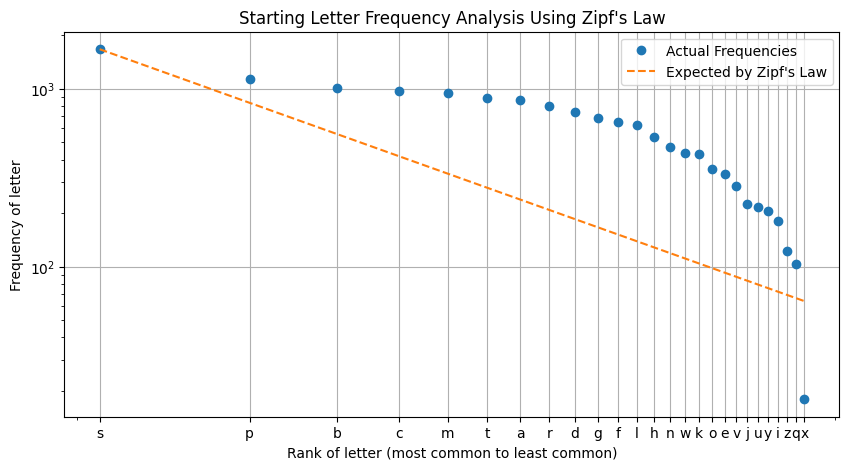

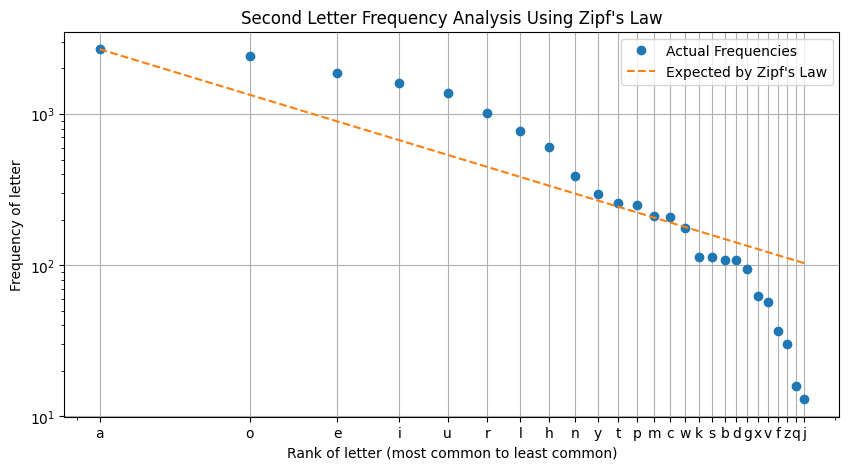

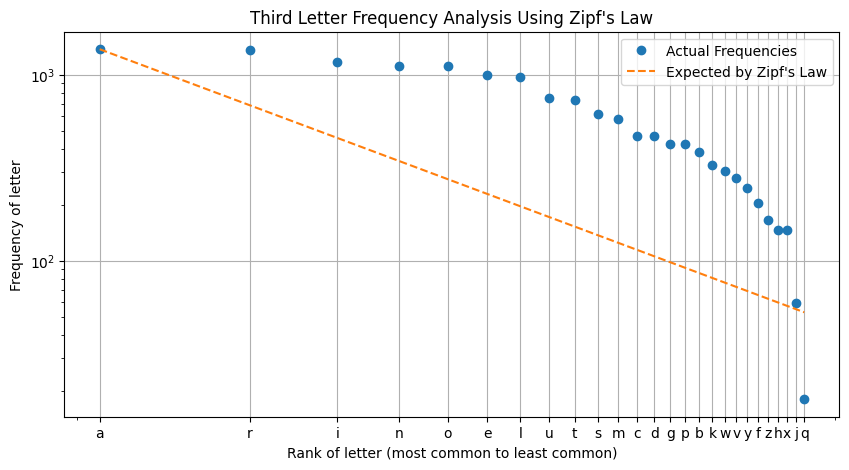

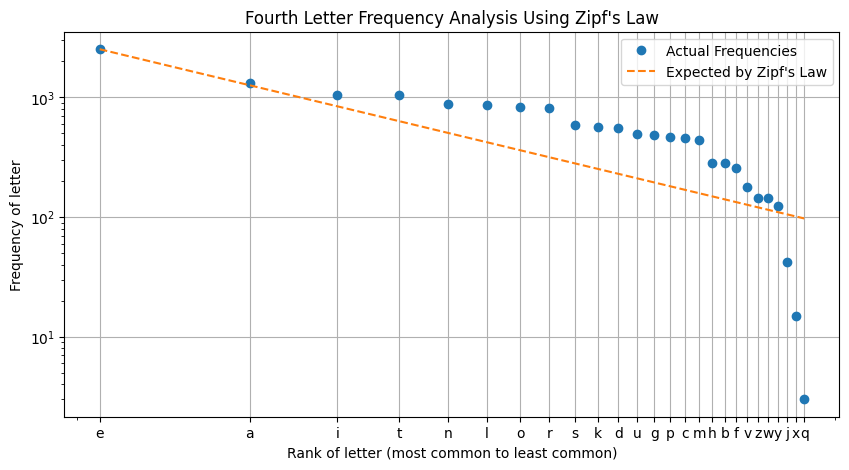

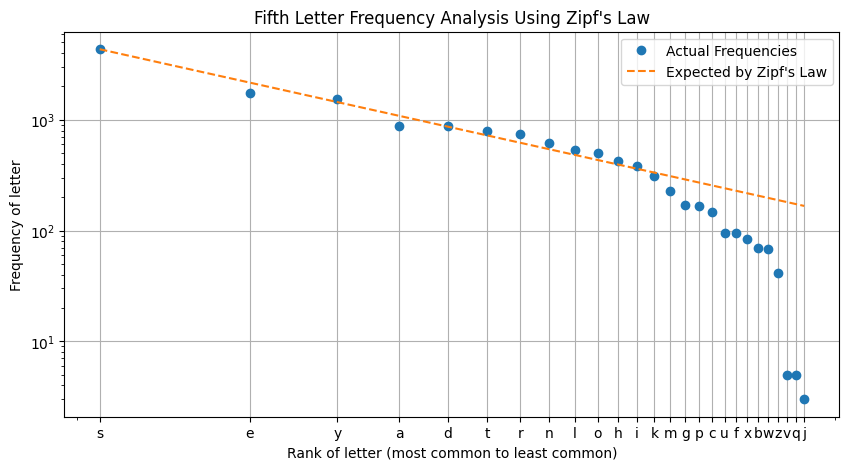

In [6]:
# analyze all letters
plot_zipfs_law(letter_frequencies, 'All Letter Frequency Analysis Using Zipf\'s Law')

# analyze starting letters
plot_zipfs_law(starting_letter_frequencies, 'Starting Letter Frequency Analysis Using Zipf\'s Law')

# analyze second letters
plot_zipfs_law(second_letter_frequencies, 'Second Letter Frequency Analysis Using Zipf\'s Law')

# analyze third letters
plot_zipfs_law(third_letter_frequencies, 'Third Letter Frequency Analysis Using Zipf\'s Law')

# analyze fourth letters
plot_zipfs_law(fourth_letter_frequencies, 'Fourth Letter Frequency Analysis Using Zipf\'s Law')

# analyze fifth letters
plot_zipfs_law(last_letter_frequencies, 'Fifth Letter Frequency Analysis Using Zipf\'s Law') 

In [7]:
#1 Pares
best_guesses = scorer.word_scores()
scorer.count_words()

14855

In [8]:
best_guesses

{'pares': 14.37016,
 'tares': 14.92077,
 'soare': 15.0113,
 'sared': 15.04401,
 'pores': 15.07828,
 'bares': 15.0873,
 'cares': 15.15666,
 'mares': 15.21634,
 'seres': 15.29025,
 'saree': 15.30317,
 'lares': 15.44602,
 'panes': 15.48195,
 'dares': 15.59787,
 'tores': 15.62889,
 'saner': 15.73099,
 'pales': 15.75059,
 'sored': 15.75213,
 'bores': 15.79542,
 'saine': 15.82508,
 'nares': 15.82876,
 'cores': 15.86478,
 'seria': 15.86638,
 'ranes': 15.86731,
 'sorel': 15.86921,
 'mores': 15.92446,
 'braes': 15.99613,
 'soree': 16.01129,
 'sores': 16.01546,
 'reais': 16.0292,
 'pates': 16.10952,
 'gares': 16.11618,
 'rales': 16.13595,
 'lores': 16.15414,
 'peats': 16.15559,
 'saned': 16.1558,
 'teras': 16.18195,
 'pones': 16.19007,
 'banes': 16.19909,
 'canes': 16.26845,
 'salet': 16.28887,
 'tales': 16.3012,
 'dores': 16.30599,
 'hares': 16.30774,
 'manes': 16.32813,
 'porae': 16.35238,
 'pears': 16.35308,
 'sater': 16.35856,
 'fares': 16.36474,
 'slate': 16.38458,
 'peals': 16.39407,
 'sen

In [9]:
# simulating the intersection algorithm (probably the MINUS algo actually)
# basically what happens after you use the guess 'Pares'
reduced_search = [(word, characters) for word, characters in scorer.words_tuple if 'r' in characters\
                  and 'e' in characters and 's' not in characters and 'p' not in characters and\
                  'a' not in characters]

In [10]:
# increase penalty to avoid words with duplicate letters
# recompute scoring; since I'm using this crude version of the intersection algo
# ignore all the words that the true algorithm will catch; e.g., tired wouldn't be in the list
scorer.recompute_scoring(reduced_search, 5)

{'tired': 13.95208,
 'tried': 14.18707,
 'roted': 14.51553,
 'toner': 14.57758,
 'cored': 14.82514,
 'citer': 14.93611,
 'retin': 15.0466,
 'trine': 15.04846,
 'tenor': 15.04881,
 'cried': 15.05564,
 'goier': 15.1902,
 'doter': 15.43751,
 'rione': 15.53748,
 'fired': 15.55476,
 'tuner': 15.64688,
 'trend': 15.65735,
 'reoil': 15.6889,
 'bored': 15.69016,
 'cider': 15.73099,
 'coder': 15.73548,
 'tride': 15.74813,
 'curie': 15.75658,
 'gored': 15.76573,
 'norie': 15.78701,
 'fried': 15.78975,
 'trice': 15.79039,
 'corey': 15.79897,
 'biter': 15.80113,
 'tiger': 15.81425,
 'timer': 15.81429,
 'their': 15.86302,
 'cured': 15.89444,
 'trone': 15.9045,
 'crine': 15.91703,
 'diner': 15.93857,
 'ronte': 15.93933,
 'doner': 15.94306,
 'rouet': 15.96623,
 'tiler': 16.00051,
 'cuter': 16.0099,
 'twier': 16.01324,
 'tyred': 16.03089,
 'niter': 16.03584,
 'noter': 16.04033,
 'trued': 16.05019,
 'toyer': 16.05543,
 'mired': 16.07909,
 'runed': 16.09038,
 'rebid': 16.09888,
 'ourie': 16.09994,
 'riv

In [11]:
# new search space. note it will be much smaller than this/or potentially a tiny better larger
# the next word that should be at the top of the list is 'Curie'
new_guess = 'curie'
scorer.count_words()

814

In [12]:
# update the reduced search space
reduced_search = [(word, characters) for word, characters in scorer.words_tuple if 'r' in characters\
                  and 'e' in characters and 's' not in characters and 'p' not in characters and\
                  'a' not in characters and 'c' in characters and\
                 'u' not in characters and 'i' not in characters]

In [13]:
scorer.recompute_scoring(reduced_search, 5)

{'corey': 13.04227,
 'coyer': 13.47458,
 'cored': 13.65119,
 'coder': 13.80569,
 'chore': 14.15391,
 'crone': 14.17707,
 'certy': 14.29974,
 'cryne': 14.57311,
 'cyder': 14.61417,
 'decor': 14.69676,
 'comer': 14.75159,
 'crome': 14.77346,
 'decry': 14.77487,
 'credo': 14.90459,
 'dreck': 14.91153,
 'corbe': 14.9943,
 'mercy': 15.07174,
 'cover': 15.21206,
 'cower': 15.24035,
 'ceorl': 15.30981,
 'oncer': 15.34346,
 'ocher': 15.44771,
 'roche': 15.46638,
 'recto': 15.48864,
 'gryce': 15.49217,
 'cyber': 15.55618,
 'chert': 15.62577,
 'treck': 15.68503,
 'croze': 15.7024,
 'force': 15.70828,
 'ochre': 15.77048,
 'clerk': 15.91221,
 'recce': 15.98792,
 'ocker': 16.06793,
 'recon': 16.10157,
 'merch': 16.13007,
 'retch': 16.54128,
 'wreck': 16.62016,
 'cheer': 16.81137,
 'creed': 16.87776,
 'cered': 16.89369,
 'ceder': 17.04819,
 'creek': 17.05735,
 'chere': 17.13414,
 'cerne': 17.17323,
 'corer': 17.27478,
 'creme': 17.75369,
 'reech': 17.79928,
 'crore': 17.84389,
 'cryer': 17.91716,
 '

In [14]:
scorer.count_words()

62

In [ ]:
# if you go through the list and remove all the words again you will get Force
new_guess = 'force'